In [17]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.stats import linregress

In [18]:
#Create path to data source CSV
csv_file = Path("../raw_data/Australian Vehicle Prices.csv")

#Read in csv information to DataFrame
AUVehiclePrices_df = pd.read_csv(csv_file)

#Display DataFrame
AUVehiclePrices_df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [19]:
#Drop empty rows and create copy due to SettingWithCopyWarning
AUVehicleCleaned_df = AUVehiclePrices_df.dropna().copy()

#Dataframe appears to have some non-string entries in FuelConsumption column
#Ensure that all entries for this column are strings
AUVehicleCleaned_df['FuelConsumption'] = AUVehicleCleaned_df['FuelConsumption'].astype(str)

#Extract number of cylinders and engine volume from 'Engine' column using .extract (place data in new columns)
#d+ represents where the desired number resides in the string
#.astype used to ensure our data is 
AUVehicleCleaned_df['Cylinders'] = AUVehicleCleaned_df['Engine'].str.extract('(\d+) cyl').astype(float)
AUVehicleCleaned_df['EngineVolume'] = AUVehicleCleaned_df['Engine'].str.extract('(\d+\.\d+) L').astype(float)

#Extract fuel consumption with similar method as above, replace the existing 'FuelConsumption' column with the extracted float value
AUVehicleCleaned_df['FuelConsumption'] = AUVehicleCleaned_df['FuelConsumption'].str.extract('(\d+\.\d+)').astype(float)

#Drop rows with missing values in FuelConsumption and EngineVolume for the box plot and linear regression
AUVehicleCleaned_df.dropna(subset=['FuelConsumption', 'EngineVolume'], inplace=True)

#Display the updated DataFrame
AUVehicleCleaned_df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,...,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Cylinders,EngineVolume
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,...,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,4.0,2.2
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,...,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,4.0,1.5
9,Honda,2014.0,Jazz,Hatchback,2014 Honda Jazz Hybrid,USED,Automatic,"4 cyl, 1.3 L",Front,Hybrid,...,38229,Blue / -,"Lidcombe, NSW",4 cyl,Hatchback,5 Doors,5 Seats,17900,4.0,1.3
11,Toyota,2018.0,HiAce,Commercial,2018 Toyota HiAce LWB,USED,Automatic,"4 cyl, 2.7 L",Rear,Unleaded,...,16324,White / Grey,"Lidcombe, NSW",4 cyl,Commercial,4 Doors,2 Seats,41999,4.0,2.7
15,Volkswagen,2012.0,Golf,Hatchback,2012 Volkswagen Golf 90 TSI Trendline,USED,Automatic,"4 cyl, 1.4 L",Front,Premium,...,55676,White / Black,"Five Dock, NSW",4 cyl,Hatchback,5 Doors,5 Seats,14999,4.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16722,Hyundai,2016.0,Accent,Sedan,2016 Hyundai Accent Active,USED,Automatic,"4 cyl, 1.4 L",Front,Unleaded,...,97610,White / -,"Mansfield, QLD",4 cyl,Sedan,4 Doors,5 Seats,13888,4.0,1.4
16724,Nissan,2009.0,Navara,Ute / Tray,2009 Nissan Navara ST (4X4),USED,Automatic,"4 cyl, 2.5 L",4WD,Diesel,...,182254,White / -,"Bacchus Marsh, VIC",4 cyl,Ute / Tray,4 Doors,5 Seats,16000,4.0,2.5
16725,MG,2022.0,HS,Springwood MG - New,2022 MG HS Phev Essence,DEMO,Automatic,"4 cyl, 1.5 L",Front,Hybrid,...,6156,White / -,"Springwood, QLD",4 cyl,SUV,4 Doors,5 Seats,46990,4.0,1.5
16727,Hyundai,2015.0,I30,Wagon,2015 Hyundai I30 Tourer Active 1.6 GDI,USED,Automatic,"4 cyl, 1.6 L",Front,Unleaded,...,54359,Silver / Black Cloth,"Oakleigh South, VIC",4 cyl,Wagon,4 Doors,5 Seats,21450,4.0,1.6


Number of data entries for 2.0 cylinders: 3
Number of data entries for 3.0 cylinders: 149
Number of data entries for 4.0 cylinders: 6121
Number of data entries for 5.0 cylinders: 344
Number of data entries for 6.0 cylinders: 918
Number of data entries for 8.0 cylinders: 316
Number of data entries for 10.0 cylinders: 1
Number of data entries for 12.0 cylinders: 6


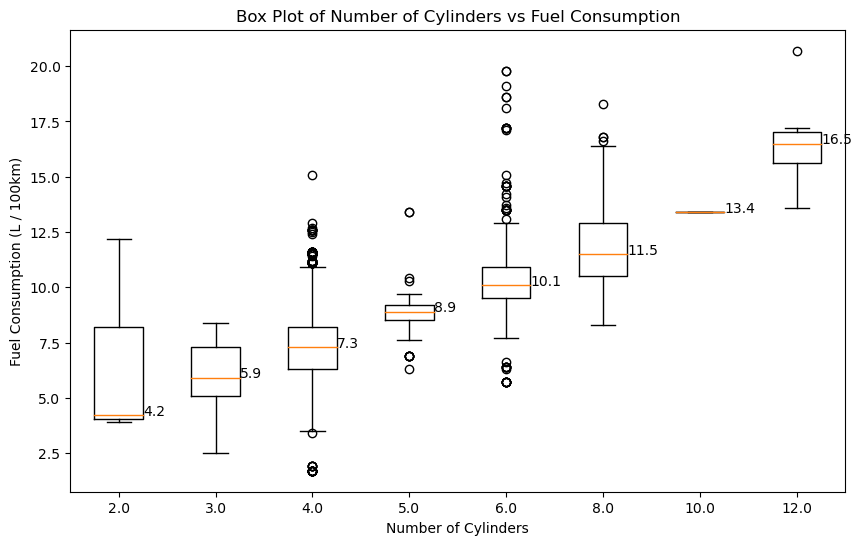

In [20]:
#Empty List declared to store data for each number of cylinders category (this will be list of lists)
CylinderData = []

#Get unique values of 'Cylinders' and sort
UniqueCylinders = sorted(AUVehicleCleaned_df['Cylinders'].unique())

#Iterate over sorted unique values of 'Cylinders'
for cylinders in UniqueCylinders:
    #Search for entries that match cylinder number and send fuel consumption data to subset list
    SubsetCylData = AUVehicleCleaned_df[AUVehicleCleaned_df['Cylinders'] == cylinders]['FuelConsumption'].dropna().tolist()
    CylinderData.append(SubsetCylData)
    
    #Print the number of entries for each cylinder count
    print(f"Number of data entries for {cylinders} cylinders: {len(SubsetCylData)}")

#Create box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot(CylinderData, labels=UniqueCylinders)
plt.xlabel('Number of Cylinders')
plt.ylabel('Fuel Consumption (L / 100km)')
plt.title('Box Plot of Number of Cylinders vs Fuel Consumption')

#Loop through boxplot data sets to retrieve medians
for median in box['medians']:
    yValue = median.get_ydata()[0]
    #Add median as text to plot (to the side of median line for each box)
    plt.text(median.get_xdata()[0] + 0.5, yValue, f'{round(yValue, 2)}')

plt.savefig('FuelConsumption_BoxPlot.png')
plt.show()

#Resource used to retrieve medians: https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html

**Explanation**
The boxplot above provides an insight into the relationship between the number of cylinders in a vehicle engine and its fuel consumption. Each box (x-axis) represents the number of cylinders in the vehicle engine from 2 to 12, with the y-axis representing the fuel consumption of the vehicle in litres per 100km.

Each box contains a middle line which is the median fuel consumption for that data set, the black number to the right of these lines is the actual number for that data set median. Each box spans from the 25th percentile to the 75th percentile and is the inter quartile range. The whiskers protruding from each box represent the outer quartiles and gives a good visual indication of the variability of these quartiles. Outliers are plotted as individual circles outside of the box and whisker area.

It should be noted that the most outliers occur for 4 and 6 cylinder engine vehicles. This likely being due to the high sample size for those two categories.

We can see that, as a trend, fuel consumption is higher in vehicles with more engine cylinders. This can be seen through the medians which increase quite steadily with each increase in cylinder number. We can also see that most of the time, the inter quartile range is shifted higher for each increase in cylinder number. The exception to this is between 2 to 3 cylinders, but this can be attributed to the very low sample size of 3 for 2 cylinder engine vehicles.


Slope Gradient: 1.7335410990228721
Intercept: 3.696937329142215
R-value (Correlation coefficient): 0.7463307419538846
Standard Error: 0.017442118916044465


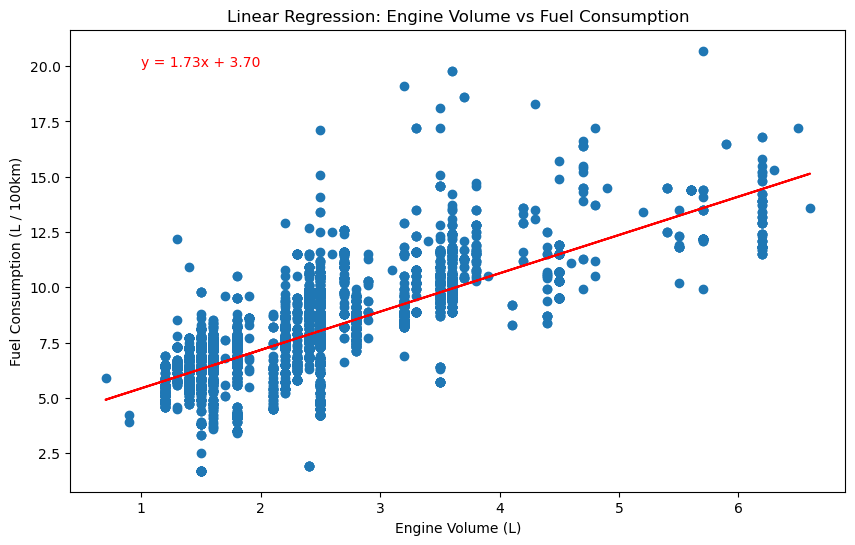

In [21]:
#Error check print statements
#print("Missing values:")
#print(AUVehicleCleaned_df[['EngineVolume', 'FuelConsumption']].isnull().sum())
#print("\nData types:")
#print(AUVehicleCleaned_df[['EngineVolume', 'FuelConsumption']].dtypes)

#Use linregress to perform linear regression for engine vol and fuel consumption
slope, intercept, rvalue, pvalue, stderr = linregress(AUVehicleCleaned_df['EngineVolume'], AUVehicleCleaned_df['FuelConsumption'])

#Print regression values
print(f"\nSlope Gradient: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (Correlation coefficient): {rvalue}")
print(f"Standard Error: {stderr}")

#Plot scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(AUVehicleCleaned_df['EngineVolume'], AUVehicleCleaned_df['FuelConsumption'])
#Add regression line
plt.plot(AUVehicleCleaned_df['EngineVolume'], slope * AUVehicleCleaned_df['EngineVolume'] + intercept, color='red')
#Add regression equation in red text
plt.text(1, 20, f'y = {slope:.2f}x + {intercept:.2f}', color='red')
plt.xlabel('Engine Volume (L)')
plt.ylabel('Fuel Consumption (L / 100km)')
plt.title('Linear Regression: Engine Volume vs Fuel Consumption')
plt.savefig('FuelConsumption_linear_regression.png')
plt.show()

**Explanation**
The above plot models a linear regression analysis between engine volume and fuel consumption. The scatter plot represents the individual data points with engine volume in litres on the x-axis and fuel consumption in litres per 100 km on the y-axis. The red line represents the linear regression model with an equation of y = 1.73x + 3.70 noted in the top left corner in red.

This linear regression equation indicates that each additional litre of engine volume results in an increase in fuel consumption by 1.73 litres per 100 km. The R-value for this linear regression is 0.746 which suggests a strong positive correlation between engine volume and fuel consumption.

The standard error of this regression is low (approx. 0.017). This indicates that the model is a strong representation of the data, and that the indicated slope of 1.73 is relatively accurate.

**Summary: Major Findings and Implications**
The box plot analysis comparing number of cylinders to fuel consumption indicates that, as a trend, fuel consumption increases with more cylinders. The median fuel consumption of vehicles with 2 engine cylinders is 4.2L/100km which is the lowest median fuel consumption. The median increases up to 7.3L/100km and 8.9L/100km for 4 and 5 engine cylinder vehicles respectively, and it increases to 16.5L/100km for the most cylinders considered which is 12.

There were notable outliers for several categories, especially for vehicles with 4 and 6 engine cylinders, which consumed far more fuel than other vehicles/engines in its category.

The linear regression analysis revealed a significant positive correlation between engine volume and fuel consumption. The regression model equation was y = 1.73x + 3.70, suggesting that every extra litre of engine volume increases fuel consumption by approx. 1.73L/100km.

The R-value of 0.746 indicates that this is a strong positive correlation. The standard error for this linear regression was 0.017, this low value suggests that our data set values are closely modeled by our linear regression.

Implications:
Our analysis suggests that consumers that prioritise fuel efficiency should opt for vehicles with smaller engine volumes and cylinder counts. Similarly for manufacturers, the relationship found between fuel consumption and engine size (cylinder count and total volume) should be considered to properly engineer a vehicle for its target consumers (that being fuel economy focused consumers or power oriented consumers).

Further notes:

Considering the more extreme data points and outliers visible in both plots, we can deduce there are other important factors besides engine volume and cylinder count that impact fuel consumption. Some of these can include vehicle weight, hybrid electrical system additions, turbo or super charger additions, fuel type used etc.

Also worth noting is the fact that there is a large difference in sample size between cylinder count categories. 4 cylinder count vehicles had 6121 data entries, while categories 2, 10 and 12 cylinder counts had very few data entries. This is worth considering as a limitation to the accuracy of the box plot.

**How much does engine size (engine volume and number of cylinders) affect fuel consumptions?**
From our analysis, engine volume is directly associated with higher levels of fuel consumption with an average increase 1.73L/100km per 1 litre increase in engine volume. The number of cylinders present in a vehicle engine is also correlated to increased fuel consumption, as the median fuel consumption of the engine increases steadily as cylinder count is increased.